In [67]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# SCRAPES THE LATEST DATA FROM WORLDOMETERS
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url)

c = r.content

soup = bs(c,'html.parser')

main_table = soup.findAll('table',{'id':'main_table_countries'})

table = main_table[0]

body = table.find('tbody')
rows = body.findAll('tr')

countries = dict()

for r in rows:
    td = r.findAll('td')
    name = td[0].get_text().strip()
    confirmed = td[1].get_text().strip()
    inc = td[2].get_text().strip()
    deaths = td[3].get_text().strip()
    d_inc = td[4].get_text().strip()
    recovered = td[5].get_text().strip()
    active_cases = td[6].get_text().strip()
    serious = td[7].get_text().strip()
    conf_p_M = td[8].get_text().strip()
    countries[name] = [confirmed,inc,deaths,d_inc,
                       recovered,active_cases,serious,conf_p_M]

cols = ['confirmed','inc','dead','dead_inc','recovered',
        'active_cases','serious','confirmed_per_M']

df = pd.DataFrame.from_dict(countries)
df = df.T
df.columns = cols



df[['inc','dead_inc']] = df[['inc','dead_inc']].apply(
    lambda x : x.str.replace('+',''))

df[['confirmed','dead','recovered','active_cases',
    'serious','inc','dead_inc']] = \
    df[['confirmed','dead','recovered','active_cases',
        'serious','inc','dead_inc']].apply(
    lambda x : x.str.replace(',',''))

df[cols] = df[cols].apply(lambda x: x.replace('',np.nan))


df[cols] = df[cols].astype(float)
df['yesterday'] = df['confirmed'] - df['inc']
df['factor'] = df['confirmed'] / df['yesterday']
cols  = ['confirmed', 'yesterday','inc', 'factor','dead', 'dead_inc', 'recovered', 'active_cases',
       'serious', 'confirmed_per_M']

df = df[cols]

#df['factor'].loc[df['factor'] == np.inf]
df['factor'] = df['factor'].replace(np.inf,np.nan)

df.head(40)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M
China,80824.0,80813.0,11.0,1.000136,3189.0,13.0,65573.0,12062.0,3610.0,56.2
Italy,17660.0,NaN,NaN,NaN,1266.0,NaN,1439.0,14955.0,1328.0,292.1
Iran,12729.0,11364.0,1365.0,1.120116,611.0,97.0,4339.0,7779.0,NaN,151.5
S. Korea,8086.0,7979.0,107.0,1.013410,72.0,5.0,714.0,7300.0,59.0,157.7
Spain,6023.0,5232.0,791.0,1.151185,191.0,58.0,517.0,5315.0,272.0,128.8
Germany,3953.0,3675.0,278.0,1.075646,8.0,NaN,46.0,3899.0,9.0,47.2
France,3661.0,NaN,NaN,NaN,79.0,NaN,12.0,3570.0,154.0,56.1
USA,2340.0,2247.0,93.0,1.041389,51.0,2.0,49.0,2240.0,10.0,7.1
Switzerland,1375.0,1139.0,236.0,1.207199,13.0,2.0,4.0,1358.0,NaN,158.9
UK,1140.0,798.0,342.0,1.428571,21.0,10.0,18.0,1101.0,20.0,16.8


In [68]:
country_names = sorted(df.index.values)
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'DRC',
 'Denmark',
 'Diamond Princess',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',

In [69]:
df.loc[df['confirmed'] > 100].sort_values('factor',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M
Philippines,111.0,64.0,47.0,1.734375,8.0,3.0,2.0,101.0,1.0,1.0
Portugal,169.0,112.0,57.0,1.508929,NaN,NaN,2.0,167.0,10.0,16.6
Finland,225.0,155.0,70.0,1.451613,NaN,NaN,1.0,224.0,NaN,40.6
UK,1140.0,798.0,342.0,1.428571,21.0,10.0,18.0,1101.0,20.0,16.8
Estonia,109.0,79.0,30.0,1.379747,NaN,NaN,NaN,109.0,NaN,82.2
Austria,655.0,504.0,151.0,1.299603,1.0,NaN,6.0,648.0,1.0,72.7
Slovenia,181.0,141.0,40.0,1.283688,NaN,NaN,NaN,181.0,4.0,87.1
San Marino,101.0,80.0,21.0,1.262500,5.0,NaN,4.0,92.0,3.0,NaN
Australia,248.0,199.0,49.0,1.246231,3.0,NaN,27.0,218.0,1.0,9.7
Belgium,689.0,559.0,130.0,1.232558,4.0,1.0,1.0,684.0,24.0,59.4


In [70]:
top_10_per_m = df.sort_values('confirmed_per_M',ascending=False).head(10)
top_10_per_m

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M
Italy,17660.0,NaN,NaN,NaN,1266.0,NaN,1439.0,14955.0,1328.0,292.1
Norway,1035.0,996.0,39.0,1.039157,1.0,NaN,1.0,1033.0,27.0,190.9
Switzerland,1375.0,1139.0,236.0,1.207199,13.0,2.0,4.0,1358.0,NaN,158.9
S. Korea,8086.0,7979.0,107.0,1.013410,72.0,5.0,714.0,7300.0,59.0,157.7
Iran,12729.0,11364.0,1365.0,1.120116,611.0,97.0,4339.0,7779.0,NaN,151.5
Denmark,827.0,804.0,23.0,1.028607,NaN,NaN,1.0,826.0,2.0,142.8
Spain,6023.0,5232.0,791.0,1.151185,191.0,58.0,517.0,5315.0,272.0,128.8
Bahrain,211.0,210.0,1.0,1.004762,NaN,NaN,60.0,151.0,1.0,124.0
Qatar,337.0,320.0,17.0,1.053125,NaN,NaN,NaN,337.0,NaN,117.0
Sweden,948.0,814.0,134.0,1.164619,2.0,1.0,1.0,945.0,2.0,93.9


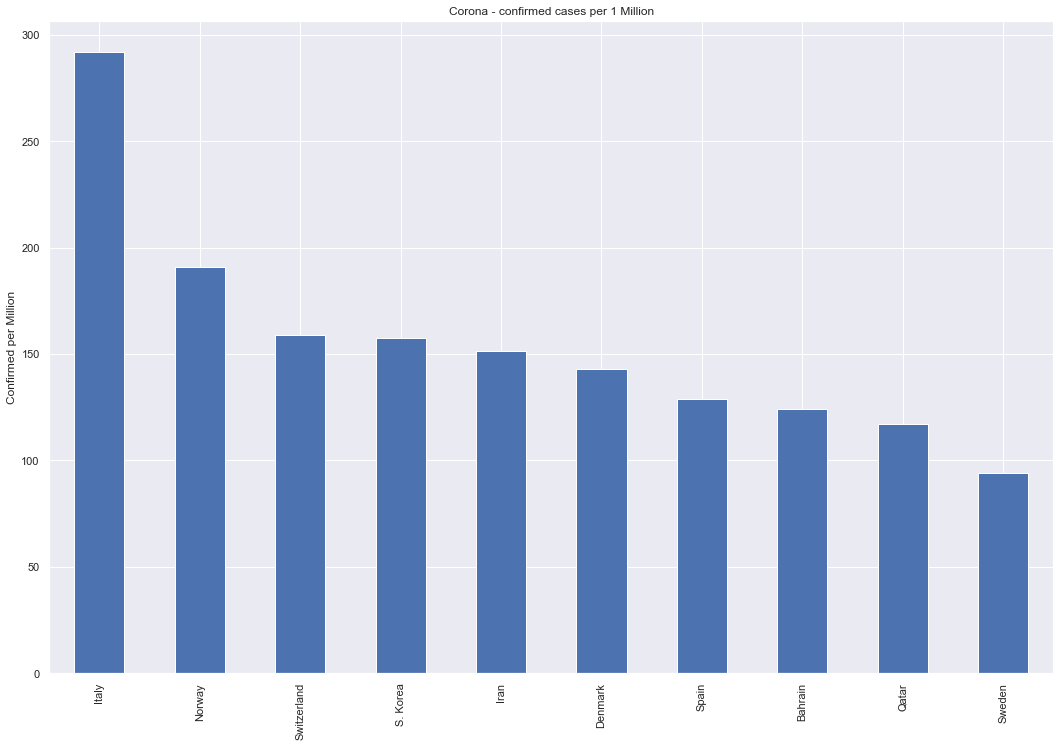

In [71]:
plt.figure(figsize=(18,12))
plt.title('Corona - confirmed cases per 1 Million')
plt.ylabel ('Confirmed per Million')
top_10_per_m['confirmed_per_M'].plot(kind='bar')
plt.savefig('confirmed_per_million.jpg',format='jpg')

In [72]:
totals = pd.DataFrame(df.sum(),columns=['totals'])
totals.drop(['factor','confirmed_per_M'],inplace=True)
totals

,totals
confirmed,150112.0
yesterday,122156.0
inc,4641.0
dead,5617.0
dead_inc,201.0
recovered,73731.0
active_cases,70764.0
serious,5708.0


In [73]:
country_names = list(sorted((df.index.unique().values)))
#country_names

In [74]:
some_countries = ['Sweden','USA','Italy','Spain','Norway','Finland',
                  'Denmark','Singapore','S. Korea','China','Russia',
                 'Poland']
countries_of_interest = df.loc[some_countries,:]
countries_of_interest.sort_values('confirmed',inplace=True,ascending=False)
countries_of_interest

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M
China,80824.0,80813.0,11.0,1.000136,3189.0,13.0,65573.0,12062.0,3610.0,56.2
Italy,17660.0,NaN,NaN,NaN,1266.0,NaN,1439.0,14955.0,1328.0,292.1
S. Korea,8086.0,7979.0,107.0,1.013410,72.0,5.0,714.0,7300.0,59.0,157.7
Spain,6023.0,5232.0,791.0,1.151185,191.0,58.0,517.0,5315.0,272.0,128.8
USA,2340.0,2247.0,93.0,1.041389,51.0,2.0,49.0,2240.0,10.0,7.1
Norway,1035.0,996.0,39.0,1.039157,1.0,NaN,1.0,1033.0,27.0,190.9
Sweden,948.0,814.0,134.0,1.164619,2.0,1.0,1.0,945.0,2.0,93.9
Denmark,827.0,804.0,23.0,1.028607,NaN,NaN,1.0,826.0,2.0,142.8
Finland,225.0,155.0,70.0,1.451613,NaN,NaN,1.0,224.0,NaN,40.6
Singapore,212.0,200.0,12.0,1.060000,NaN,NaN,97.0,115.0,11.0,36.2


In [75]:
countries_of_interest.sort_values('confirmed_per_M',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M
Italy,17660.0,NaN,NaN,NaN,1266.0,NaN,1439.0,14955.0,1328.0,292.1
Norway,1035.0,996.0,39.0,1.039157,1.0,NaN,1.0,1033.0,27.0,190.9
S. Korea,8086.0,7979.0,107.0,1.013410,72.0,5.0,714.0,7300.0,59.0,157.7
Denmark,827.0,804.0,23.0,1.028607,NaN,NaN,1.0,826.0,2.0,142.8
Spain,6023.0,5232.0,791.0,1.151185,191.0,58.0,517.0,5315.0,272.0,128.8
Sweden,948.0,814.0,134.0,1.164619,2.0,1.0,1.0,945.0,2.0,93.9
China,80824.0,80813.0,11.0,1.000136,3189.0,13.0,65573.0,12062.0,3610.0,56.2
Finland,225.0,155.0,70.0,1.451613,NaN,NaN,1.0,224.0,NaN,40.6
Singapore,212.0,200.0,12.0,1.060000,NaN,NaN,97.0,115.0,11.0,36.2
USA,2340.0,2247.0,93.0,1.041389,51.0,2.0,49.0,2240.0,10.0,7.1
